The file lynx.txt provides annual numbers of lynx trappings for 1821–1934 in the Mackenzie Riverbasin (the actual data form the third column of the file). Do one of the following:

1. Take the logarithms of the data and fit a seasonal model to the logarithmic series
2. Fit a seasonal model to the original time series
3. Try fitting an AR(2) model plus a simple harmonic wave to the original data, as suggested in Campbell, M. J. and Walker, A. M. (1977). A Survey of statistical work on the Mackenzie Riverseries of annual Canadian lynx trappings for the years 1821–1934 and a new analysis.Journal of theRoyal Statistical Societyseries A, 140, 411–431.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('seaborn-colorblind')

import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

# Fiting a seasonal model to the original time series

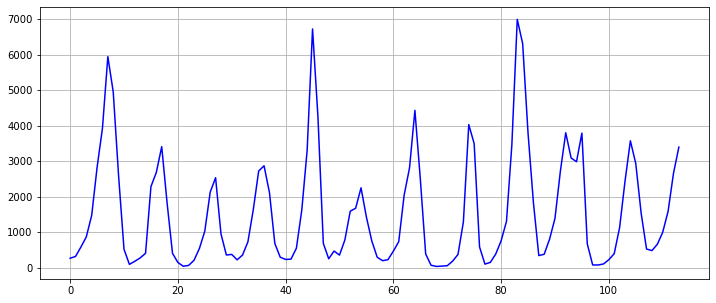

In [2]:
data = np.loadtxt('data/lynx.txt').T[2]
N = len(data)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data, c='blue')
ax.grid(True)
plt.show()

###  Autocorrelation function (ACF) 

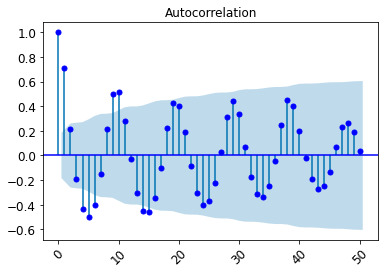

In [3]:
p = 50
plot_acf(data, lags = p,color ='blue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

###  Partial autocorrelation function (PACF) 

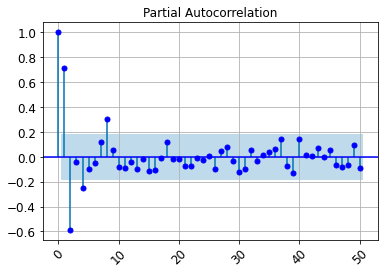

In [4]:
plot_pacf(data, lags = p, method = 'ywmle',color ='blue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

## Seasonality - statsmodels + STL 



period =  8


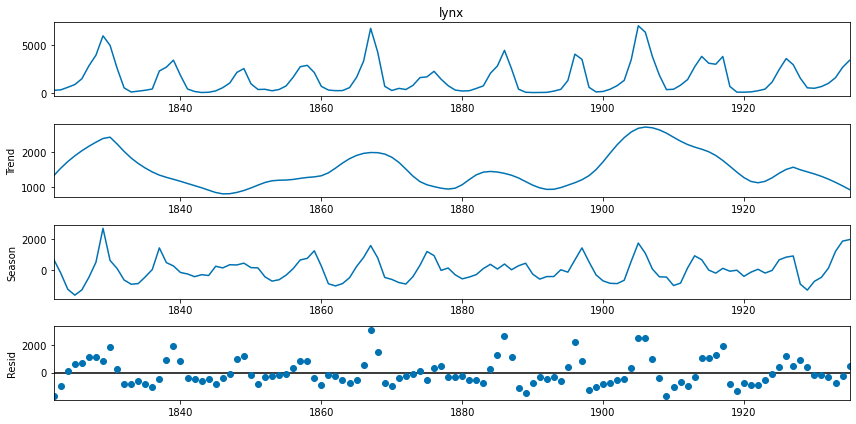



period =  9


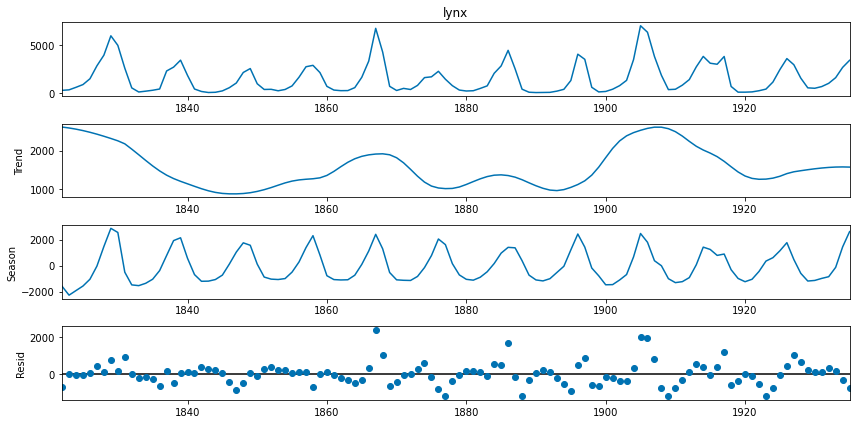



period =  10


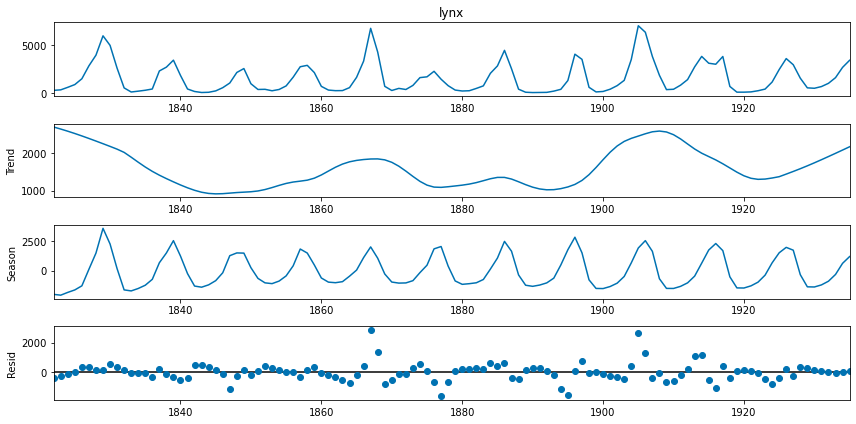

In [5]:
from statsmodels.tsa.seasonal import STL
plt.rcParams["figure.figsize"] = (12,6)

df = pd.Series(data, index=pd.date_range('1821', periods=len(data), freq='Y'), name = 'lynx')
df.describe()

for i in range(8, 11):
    print("\n\nperiod = ", i)
    stl = STL(df, period =i)
    res = stl.fit()
    fig = res.plot()
    plt.show()

## Seasonality - statsmodels + UnobservedComponents 

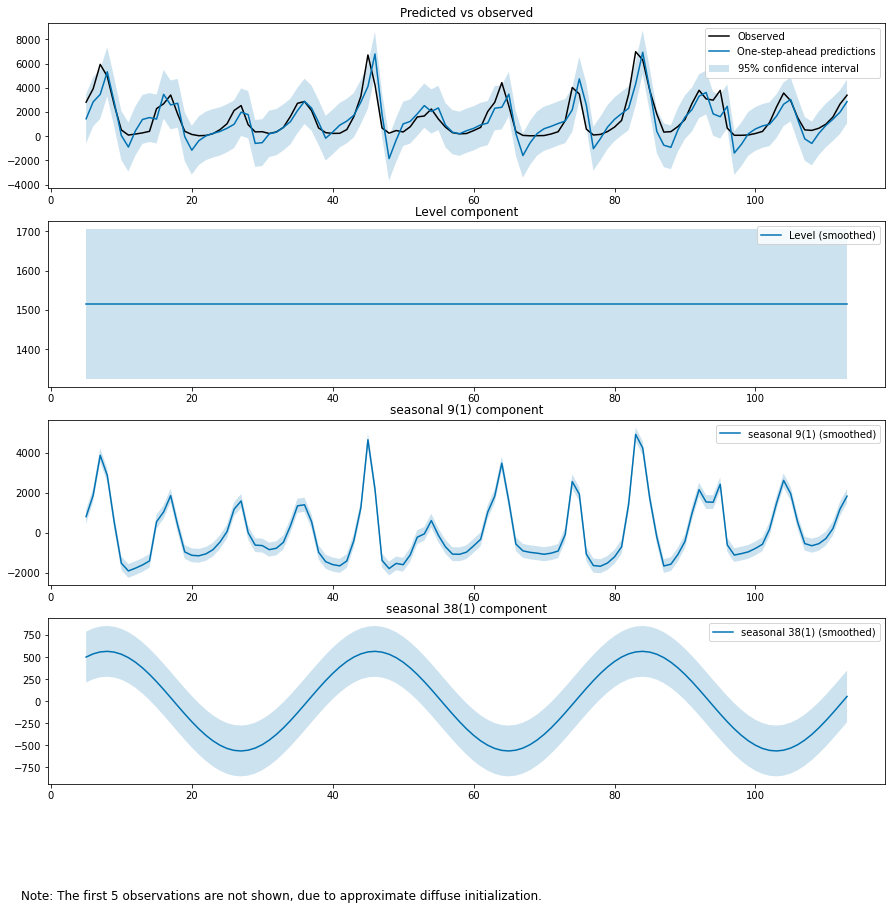

In [6]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 9,
                                                    'harmonics': 1},
                                                   {'period': 38,
                                                    'harmonics': 1},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

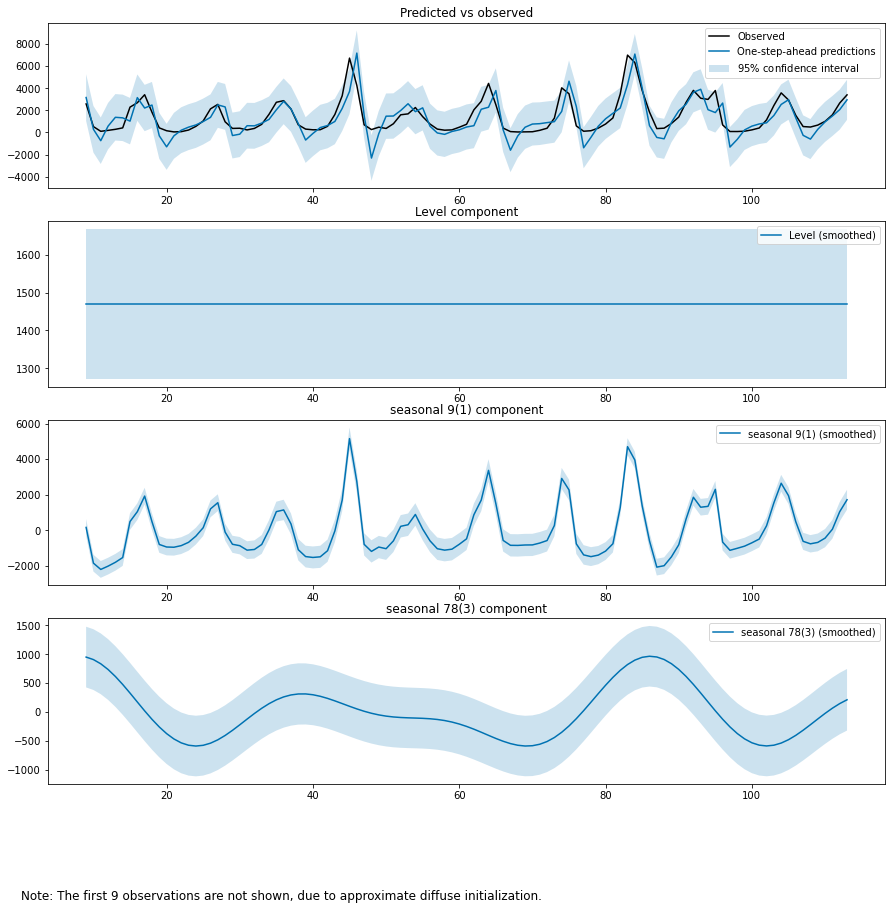

In [7]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 9,
                                                    'harmonics': 1},
                                                   {'period': 78,
                                                    'harmonics': 3},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

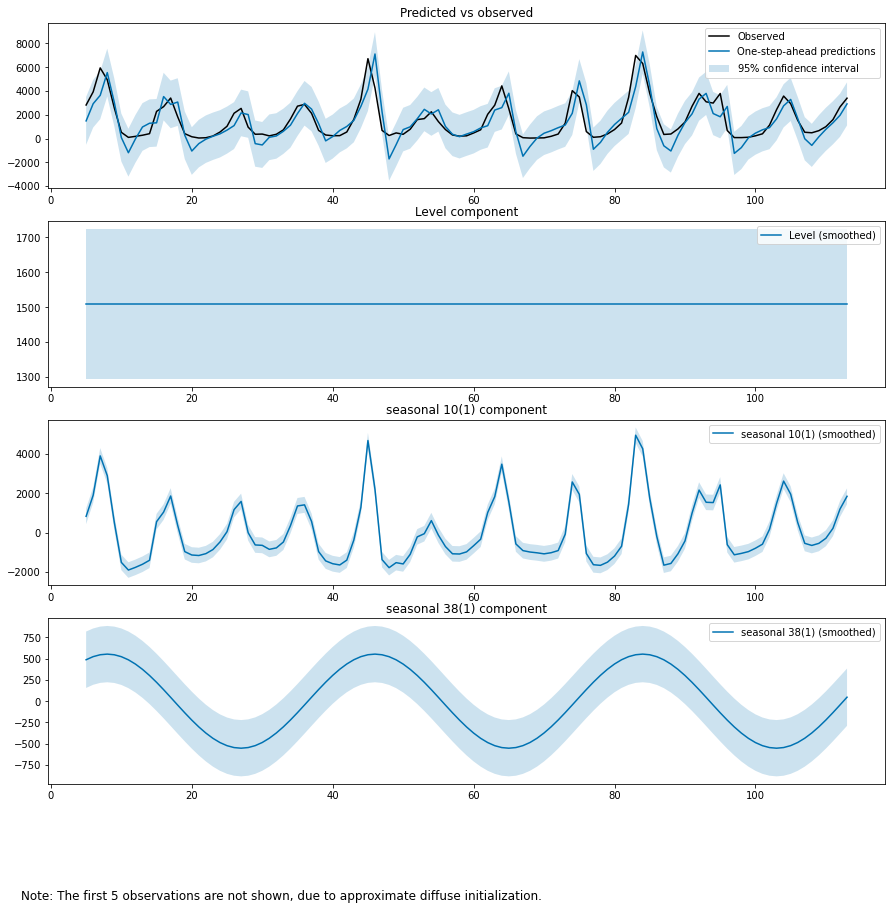

In [8]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 10,
                                                    'harmonics': 1},
                                                   {'period': 38,
                                                    'harmonics': 1},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

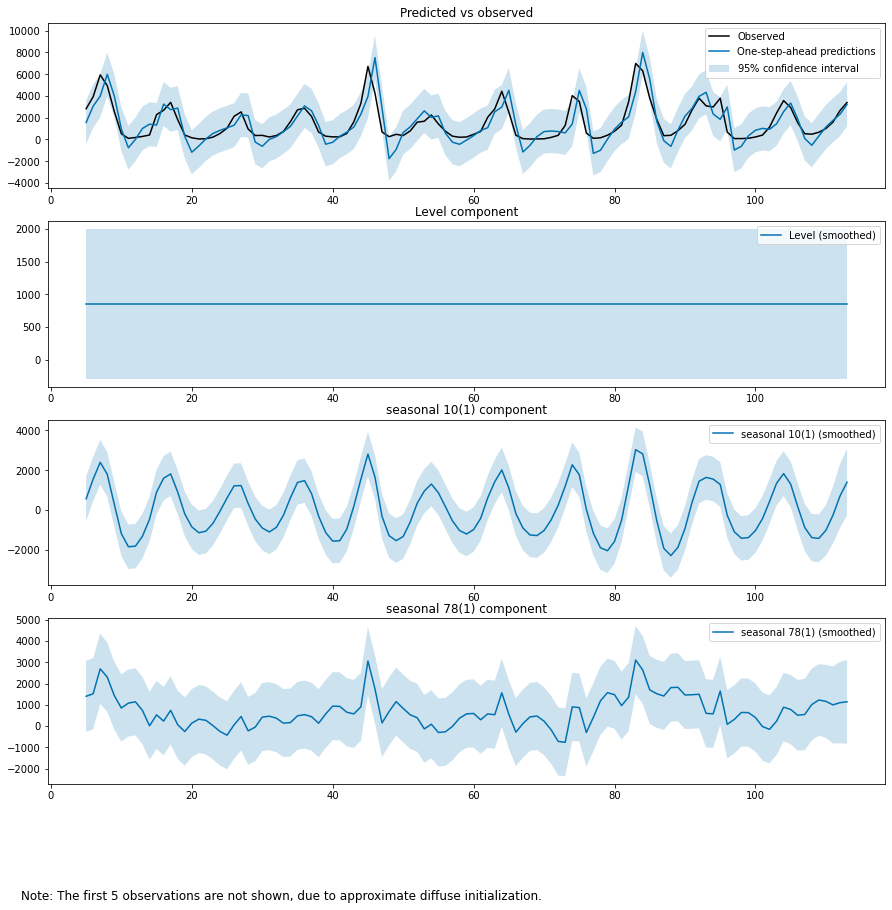

In [9]:
plt.rcParams["figure.figsize"] = (15,14)
model = sm.tsa.UnobservedComponents(data,
                                    level='fixed intercept',
                                    freq_seasonal=[{'period': 10,
                                                    'harmonics': 1},
                                                   {'period': 78,
                                                    'harmonics': 1},
                                                   ])
res_f = model.fit(disp=False)
res_f.plot_components()
plt.show()

## Fit a seasonal model to the original time series

In [10]:
df = pd.DataFrame(data, columns = ['y_t'])

df['y_(t1)'] = df['y_t'].shift(-1)
df['y_(t2)'] = df['y_t'].shift(-2)
df['y_(t3)'] = df['y_t'].shift(-3)
df['y_(t4)'] = df['y_t'].shift(-4)
df['y_(t5)'] = df['y_t'].shift(-5)
df['y_(t6)'] = df['y_t'].shift(-6)
df['y_(t7)'] = df['y_t'].shift(-7)
df['y_(t8)'] = df['y_t'].shift(-8)
df['y_(t9)'] = df['y_t'].shift(-9)

df['y_(t10)'] = df['y_t'].shift(-10)
df['y_(t11)'] = df['y_t'].shift(-11)
df['y_(t12)'] = df['y_t'].shift(-12)
df['y_(t13)'] = df['y_t'].shift(-13)
df['y_(t14)'] = df['y_t'].shift(-14)
df['y_(t15)'] = df['y_t'].shift(-15)
df['y_(t16)'] = df['y_t'].shift(-16)
df['y_(t17)'] = df['y_t'].shift(-17)
df['y_(t18)'] = df['y_t'].shift(-18)
df['y_(t19)'] = df['y_t'].shift(-19)
df['y_(t20)'] = df['y_t'].shift(-20)


df.dropna(inplace = True)

df['Delta_1'] = df['y_(t1)'] - df['y_t']
df['Delta_2'] = df['y_(t2)'] - df['y_t']
df['Delta_3'] = df['y_(t3)'] - df['y_t']
df['Delta_4'] = df['y_(t4)'] - df['y_t']
df['Delta_5'] = df['y_(t5)'] - df['y_t']
df['Delta_6'] = df['y_(t6)'] - df['y_t']
df['Delta_7'] = df['y_(t7)'] - df['y_t']
df['Delta_8'] = df['y_(t8)'] - df['y_t']
df['Delta_9'] = df['y_(t9)'] - df['y_t']

df['Delta_10'] = df['y_(t10)'] - df['y_t']
df['Delta_11'] = df['y_(t11)'] - df['y_t']
df['Delta_12'] = df['y_(t12)'] - df['y_t']
df['Delta_13'] = df['y_(t13)'] - df['y_t']
df['Delta_14'] = df['y_(t14)'] - df['y_t']
df['Delta_15'] = df['y_(t15)'] - df['y_t']
df['Delta_16'] = df['y_(t16)'] - df['y_t']
df['Delta_17'] = df['y_(t17)'] - df['y_t']
df['Delta_18'] = df['y_(t18)'] - df['y_t']
df['Delta_19'] = df['y_(t19)'] - df['y_t']
df['Delta_20'] = df['y_(t20)'] - df['y_t']

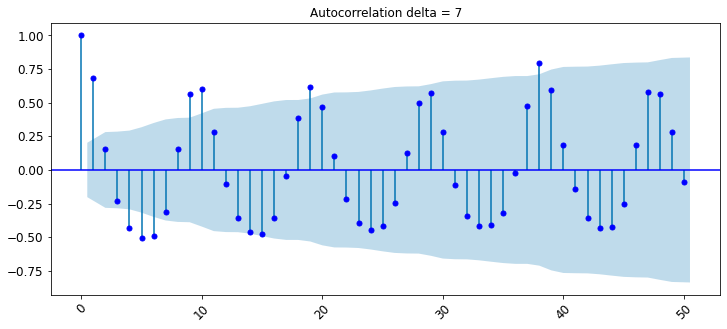

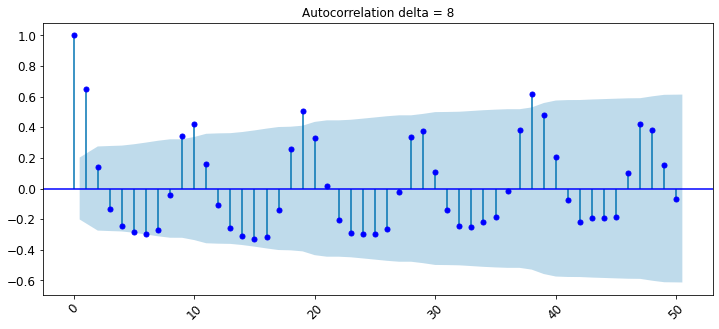

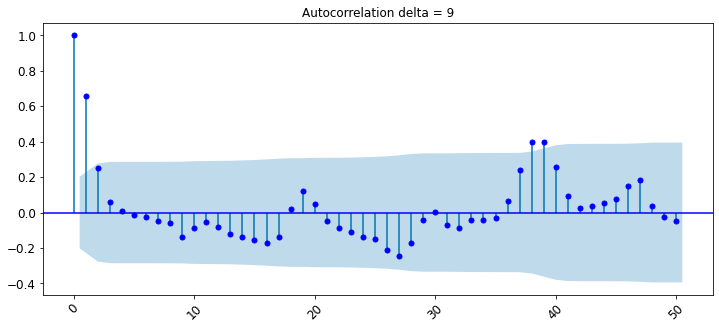

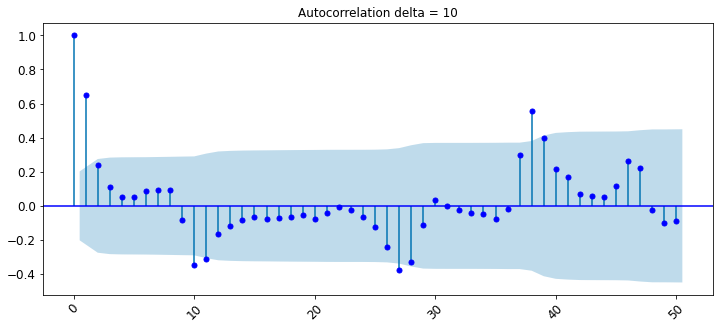

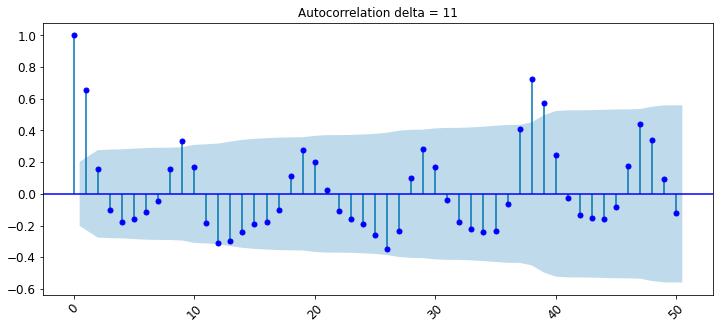

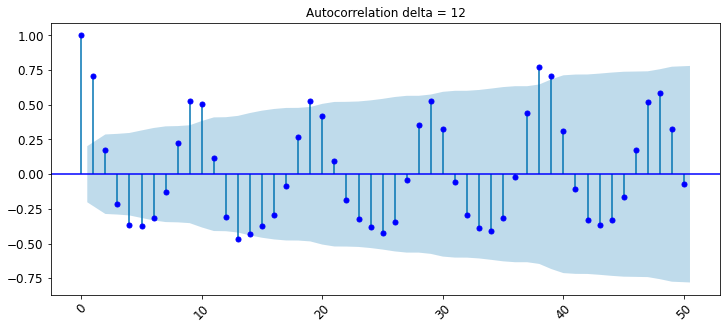

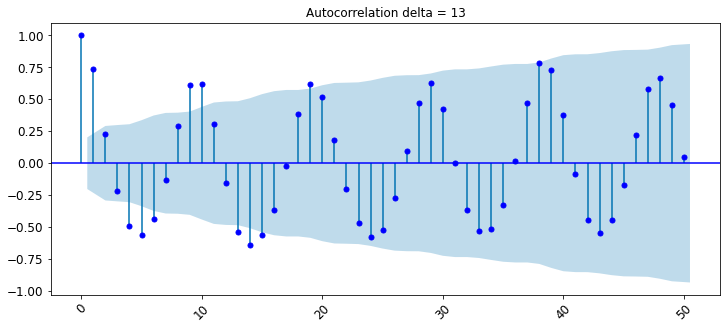

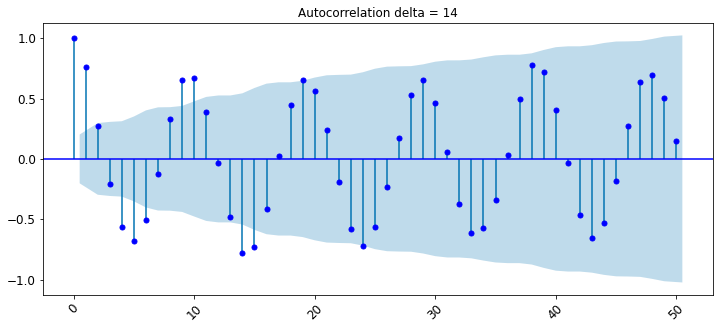

In [11]:
plt.rcParams["figure.figsize"] = (12,5)
p =50
plot_acf(df['Delta_7'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 7')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_8'], lags = p, unbiased=True,color ='blue', title ='Autocorrelation delta = 8')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_9'], lags = p, unbiased=True,color ='blue', title ='Autocorrelation delta = 9')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_10'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 10')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_11'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 11')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


plot_acf(df['Delta_12'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 12')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_13'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 13')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_acf(df['Delta_14'], lags = p, unbiased=True, color ='blue', title ='Autocorrelation delta = 14')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


# Final model

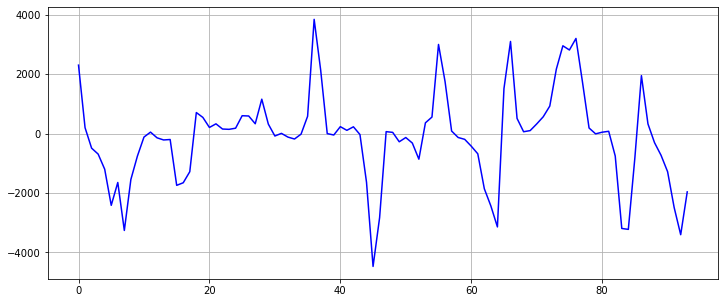

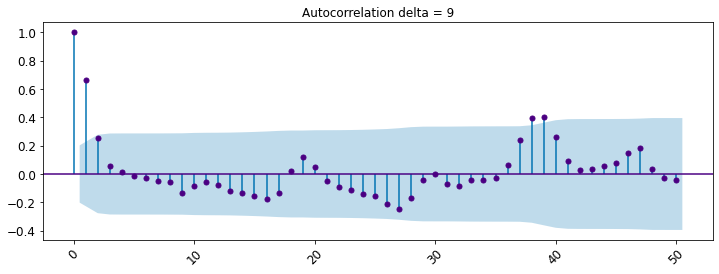

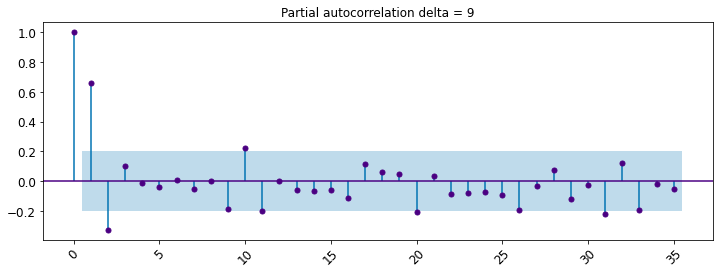

In [12]:
plt.rcParams["figure.figsize"] = (12,4)
p = 50

final_data_1 = np.array(df['Delta_9'])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(final_data_1, c='blue')
ax.grid(True)
plt.show()

plot_acf(final_data_1, lags = p, unbiased=True, color ='indigo', title ='Autocorrelation delta = 9')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(final_data_1, lags = 35, color ='indigo', title ='Partial autocorrelation delta = 9')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

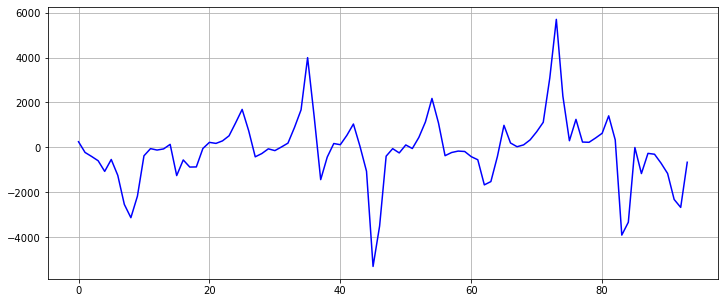

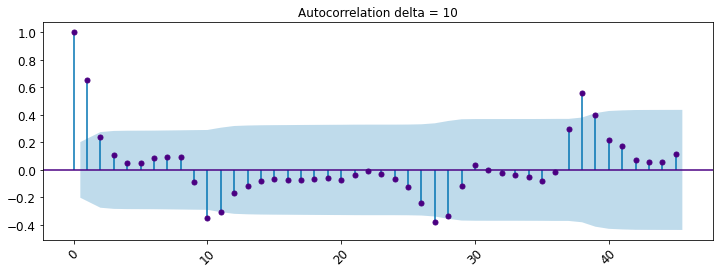

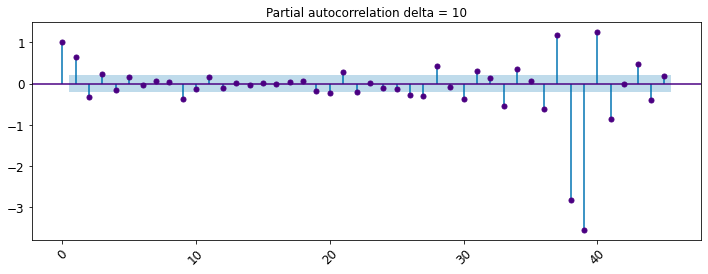

In [13]:
plt.rcParams["figure.figsize"] = (12,4)
p = 45

final_data_2 = np.array(df['Delta_10'])

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(final_data_2, c='blue')
ax.grid(True)
plt.show()

plot_acf(final_data_2, lags = p, unbiased=True, color ='indigo', title ='Autocorrelation delta = 10')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

plot_pacf(final_data_2, lags = p, color ='indigo', title ='Partial autocorrelation delta = 10')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Fitting ARMA(p,q) parameters to de-seasonalited data:  brute force method

In [14]:
def check_for_ARMA(dta, p_max, q_max):
    
    aic = pd.DataFrame(np.zeros((p_max, q_max), dtype=float))
    bic = pd.DataFrame(np.zeros((p_max, q_max), dtype=float))

    for p in range(p_max):
        for q in range(q_max):
            if p == 0 and q == 0:
                continue
            try:
                mod = sm.tsa.ARMA(dta, (p,q)).fit()
                aic.iloc[p,q] = mod.aic
                bic.iloc[p,q] = mod.bic

            except:
                aic.iloc[p,q] = np.nan
                bic.iloc[p,q] = np.nan

    return aic, bic

### data with seasonality 9

In [15]:
aic, bic = check_for_ARMA(final_data_1, 8,8)

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47001D+00    |proj g|=  2.32278D-02

At iterate    5    f=  8.46888D+00    |proj g|=  2.61124D-05

At iterate   10    f=  8.46888D+00    |proj g|=  5.61151D-04

At iterate   15    f=  8.46882D+00    |proj g|=  3.67617D-03

At iterate   20    f=  8.46878D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     32      1     0     0   7.105D-07   8.469D+00
  F =   8.4687816976008410     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40209D+00    |proj g|=  1.58794D-02

At iterate    5    f=  8.40129D+00    |proj g|=  1.19016D-05

At iterate   10    f=  8.40129D+00    |proj g|=  5.00577D-04

At iterate   15    f=  8.40123D+00    |proj g|=  5.34008D-03

At iterate   20    f=  8.40089D+00    |proj g|=  4.96314D-04

At iterate   25    f=  8.40089D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.39699D+00    |proj g|=  2.13163D-05

At iterate   10    f=  8.39699D+00    |proj g|=  1.27542D-04

At iterate   15    f=  8.39698D+00    |proj g|=  2.05258D-03

At iterate   20    f=  8.39656D+00    |proj g|=  5.15374D-03

At iterate   25    f=  8.39642D+00    |proj g|=  3.87246D-05

At iterate   30    f=  8.39642D+00    |proj g|=  5.86198D-06

At iterate   35    f=  8.39642D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     49      1     0     0   3.553D-07   8.396D+00
  F =   8.3964228762277102     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39907D+00    |proj g|=  1.80526D-02

At iterate    5    f=  8.39658D+00    |proj g|=  4.65938D-04

At iterate   10    f=  8.39658D+00    |proj g|=  2.48690D-05

At iterate   15    f=  8.39658D+00    |proj g|=  7.28129D-04

At iterate   20    f=  8.39624D+00    |proj g|=  4.40270D-03

At iterate   25    f=  8.39617D+00    |proj g|=  4.44089D-06

At iterate   30    f=  8.39617D+00    |proj g|=  1.42109D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  8.38920D+00    |proj g|=  5.96323D-04

At iterate   10    f=  8.38919D+00    |proj g|=  1.24345D-05

At iterate   15    f=  8.38919D+00    |proj g|=  6.82121D-05

At iterate   20    f=  8.38919D+00    |proj g|=  1.04627D-03

At iterate   25    f=  8.38871D+00    |proj g|=  9.12532D-03

At iterate   30    f=  8.38845D+00    |proj g|=  6.96332D-05

At iterate   35    f=  8.38845D+00    |proj g|=  5.32907D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     49      1     0     0   3.553D-07   8.388D+00
  F =   8.3884468926560416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36629D+00    |proj g|=  3.19730D-02

At iterate    5    f=  8.35556D+00    |proj g|=  1.19776D-02

At iterate   10    f=  8.35236D+00    |proj g|=  1.09990D-02

At iterate   15    f=  8.35170D+00    |proj g|=  5.81046D-03

At iterate   20    f=  8.35158D+00    |proj g|=  2.03038D-03

At iterate   25    f=  8.35153D+00    |proj g|=  9.09672D-04

At iterate   30    f=  8.35151D+00    |proj g|=  4.41425D-04

At iterate   35    f=  8.35150D+00    |proj g|=  3.39107D-04

At iterate   40    f=  8.35150D+00    |proj g|=  5.82645D-04

At iterate   45    f=  8.35150D+00    |proj g|=  1.81011D-04

At iterate   50    f=  8.35150D+00    |proj g|=  4.85656D-04

At iterate   55    f=  8.35149D+00    |proj g|=  2.49933D-04

At iterate   60    f=  8.35149D+00    |proj g|=  5.72697D-04

At iterate   65    f=  8.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46296D+00    |proj g|=  6.30695D-03

At iterate    5    f=  8.46282D+00    |proj g|=  5.06262D-05

At iterate   10    f=  8.46281D+00    |proj g|=  1.11946D-03

At iterate   15    f=  8.46214D+00    |proj g|=  2.91056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     21      1     0     0   0.000D+00   8.462D+00
  F =   8.4621073677727470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39685D+00    |proj g|=  1.79128D-03

At iterate    5    f=  8.39683D+00    |proj g|=  1.56852D-04

At iterate   10    f=  8.39683D+00    |proj g|=  5.86198D-05

At iterate   15    f=  8.39682D+00    |proj g|=  1.27720D-03

At iterate   20    f=  8.39648D+00    |proj g|=  9.62430D-04

At iterate   25    f=  8.39646D+00    |proj g|=  1.42109D-05

At iterate   30    f=  8.39646D+00    |proj g|=  2.84217D-06

At iterate   35    f=  8.39646D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39712D+00    |proj g|=  1.25755D-02

At iterate    5    f=  8.39675D+00    |proj g|=  9.41468D-06

At iterate   10    f=  8.39675D+00    |proj g|=  4.56701D-04

At iterate   15    f=  8.39674D+00    |proj g|=  2.79066D-04

At iterate   20    f=  8.39674D+00    |proj g|=  3.60600D-05

At iterate   25    f=  8.39674D+00    |proj g|=  1.10401D-03

At iterate   30    f=  8.39650D+00    |proj g|=  3.86109D-03

At iterate   35    f=  8.39644D+00    |proj g|=  2.69651D-04

At iterate   40    f=  8.39644D+00    |proj g|=  5.98632D-05

At iterate   45    f=  8.39644D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate   10    f=  8.39468D+00    |proj g|=  3.69804D-02

At iterate   15    f=  8.37548D+00    |proj g|=  4.83078D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.34478D+00    |proj g|=  1.44844D-02

At iterate   25    f=  8.34226D+00    |proj g|=  5.84901D-03

At iterate   30    f=  8.34129D+00    |proj g|=  2.35136D-03

At iterate   35    f=  8.34121D+00    |proj g|=  4.87788D-04

At iterate   40    f=  8.34121D+00    |proj g|=  9.02389D-05

At iterate   45    f=  8.34121D+00    |proj g|=  8.02913D-05

At iterate   50    f=  8.34121D+00    |proj g|=  5.61329D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f=  8.34121D+00    |proj g|=  2.43716D-04

At iterate   60    f=  8.34119D+00    |proj g|=  2.95657D-03

At iterate   65    f=  8.34076D+00    |proj g|=  4.06537D-03

At iterate   70    f=  8.34067D+00    |proj g|=  7.19425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     73    132      3     0     0   1.492D-05   8.341D+00
  F =   8.3406662181797486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39249D+00    |proj g|=  2.43148D-02

At iterate    5    f=  8.37707D+00    |proj g|=  6.50065D-02

At iterate   10    f=  8.33713D+00    |proj g|=  2.03800D-02

At iterate   15    f=  8.33320D+00    |proj g|=  4.16556D-03

At iterate   20    f=  8.33213D+00    |proj g|=  6.29203D-03

At iterate   25    f=  8.33164D+00    |proj g|=  9.45022D-04

At iterate   30    f=  8.33159D+00    |proj g|=  6.36113D-04

At iterate   35    f=  8.33158D+00    |proj g|=  9.00613D-05

At iterate   40    f=  8.33158D+00    |proj g|=  8.93507D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     62      1     0     0   5.880D-05   8.332D+00
  F =   8.3315837284140954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40334D+00    |proj g|=  3.26619D-03

At iterate    5    f=  8.40331D+00    |proj g|=  4.58300D-05

At iterate   10    f=  8.40330D+00    |proj g|=  1.34524D-03

At iterate   15    f=  8.40314D+00    |proj g|=  1.48734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   0.000D+00   8.403D+00
  F =   8.4031361392115276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39696D+00    |proj g|=  7.39497D-04

At iterate    5    f=  8.39680D+00    |proj g|=  3.64206D-03

At iterate   10    f=  8.39674D+00    |proj g|=  9.23705D-06

At iterate   15    f=  8.39674D+00    |proj g|=  7.57083D-04

At iterate   20    f=  8.39653D+00    |proj g|=  4.05187D-03

At iterate   25    f=  8.39644D+00    |proj g|=  4.12115D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38766D+00    |proj g|=  3.62659D-02

At iterate    5    f=  8.38208D+00    |proj g|=  3.60370D-03

At iterate   10    f=  8.38172D+00    |proj g|=  2.01972D-04

At iterate   15    f=  8.38161D+00    |proj g|=  4.78515D-03

At iterate   20    f=  8.37860D+00    |proj g|=  1.41934D-02

At iterate   25    f=  8.37611D+00    |proj g|=  2.12097D-04

At iterate   30    f=  8.37611D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   30    f=  8.35462D+00    |proj g|=  8.74731D-03

At iterate   35    f=  8.35297D+00    |proj g|=  2.94325D-03

At iterate   40    f=  8.35280D+00    |proj g|=  6.98286D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.35280D+00    |proj g|=  1.63425D-05

At iterate   50    f=  8.35280D+00    |proj g|=  1.40332D-05

At iterate   55    f=  8.35280D+00    |proj g|=  2.71783D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   60    f=  8.35280D+00    |proj g|=  1.42109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     60    111      2     0     0   1.421D-05   8.353D+00
  F =   8.3527991914263620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35295D+00    |proj g|=  1.72374D-02

At iterate    5    f=  8.34650D+00    |proj g|=  1.72696D-02

At iterate   10    f=  8.34483D+00    |proj g|=  1.77351D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.33603D+00    |proj g|=  1.66189D-02

At iterate   25    f=  8.33560D+00    |proj g|=  1.12976D-04

At iterate   30    f=  8.33560D+00    |proj g|=  5.02709D-05

At iterate   35    f=  8.33560D+00    |proj g|=  2.73559D-05

At iterate   40    f=  8.33560D+00    |proj g|=  1.42286D-04

At iterate   45    f=  8.33546D+00    |proj g|=  7.98295D-03

At iterate   50    f=  8.33500D+00    |proj g|=  1.34257D-03

At iterate   55    f=  8.33500D+00    |proj g|=  1.36779D-05

At iterate   60    f=  8.33500D+00    |proj g|=  4.44089D-06

At iterate   65    f=  8.33500D+00    |proj g|=  2.13163D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39719D+00    |proj g|=  1.60103D-03

At iterate    5    f=  8.39718D+00    |proj g|=  3.35199D-04

At iterate   10    f=  8.39717D+00    |proj g|=  2.18492D-05

At iterate   15    f=  8.39717D+00    |proj g|=  4.68958D-05

At iterate   20    f=  8.39717D+00    |proj g|=  6.95799D-04

At iterate   25    f=  8.39699D+00    |proj g|=  3.98277D-03

At iterate   30    f=  8.39691D+00    |proj g|=  4.92051D-05

At iterate   35    f=  8.39691D+00    |proj g|=  1.24345D-06

At iterate   40    f=  8.39691D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39677D+00    |proj g|=  3.74261D-03

At iterate    5    f=  8.39669D+00    |proj g|=  1.66338D-03

At iterate   10    f=  8.39668D+00    |proj g|=  2.87770D-05

At iterate   15    f=  8.39668D+00    |proj g|=  7.85150D-05

At iterate   20    f=  8.39668D+00    |proj g|=  1.07825D-04

At iterate   25    f=  8.39667D+00    |proj g|=  1.58540D-03

At iterate   30    f=  8.39639D+00    |proj g|=  1.40012D-03

At iterate   35    f=  8.39637D+00    |proj g|=  1.05693D-04

At iterate   40    f=  8.39637D+00    |proj g|=  6.78568D-05

At iterate   45    f=  8.39637D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37745D+00    |proj g|=  7.73820D-02

At iterate    5    f=  8.35504D+00    |proj g|=  9.26210D-03

At iterate   10    f=  8.34497D+00    |proj g|=  8.51443D-03

At iterate   15    f=  8.34419D+00    |proj g|=  3.96661D-04

At iterate   20    f=  8.34395D+00    |proj g|=  5.52092D-03


 This problem is unconstrained.



At iterate   25    f=  8.33580D+00    |proj g|=  4.03594D-02

At iterate   30    f=  8.32706D+00    |proj g|=  2.23697D-03

At iterate   35    f=  8.32570D+00    |proj g|=  5.20828D-04

At iterate   40    f=  8.32561D+00    |proj g|=  1.26299D-04

At iterate   45    f=  8.32561D+00    |proj g|=  7.67031D-04

At iterate   50    f=  8.32561D+00    |proj g|=  2.37499D-04

At iterate   55    f=  8.32561D+00    |proj g|=  2.03215D-04

At iterate   60    f=  8.32561D+00    |proj g|=  1.06759D-04

At iterate   65    f=  8.32561D+00    |proj g|=  2.52243D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     70    136      2     0     0   7.994D-06   8.326D+00
  F =   8.3256093964002140     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36343D+00    |proj g|=  6.57213D-02

At iterate    5    f=  8.34713D+00    |proj g|=  1.09388D-02

At iterate   10    f=  8.34280D+00    |proj g|=  9.27010D-03

At iterate   15    f=  8.34122D+00    |proj g|=  7.19069D-03

At iterate   20    f=  8.34023D+00    |proj g|=  6.55653D-04

At iterate   25    f=  8.34020D+00    |proj g|=  1.07150D-03

At iterate   30    f=  8.33498D+00    |proj g|=  2.99336D-02

At iterate   35    f=  8.32587D+00    |proj g|=  5.19194D-03

At iterate   40    f=  8.32550D+00    |proj g|=  3.58469D-04

At iterate   45    f=  8.32543D+00    |proj g|=  5.71099D-04

At iterate   50    f=  8.32543D+00    |proj g|=  5.81402D-04

At iterate   55    f=  8.32543D+00    |proj g|=  2.70184D-04

At iterate   60    f=  8.32543D+00    |proj g|=  3.42837D-05

           * * *

Tit   = 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39371D+00    |proj g|=  1.80747D-01

At iterate    5    f=  8.38962D+00    |proj g|=  4.54087D-02

At iterate   10    f=  8.38854D+00    |proj g|=  2.22851D-02


 This problem is unconstrained.



At iterate   15    f=  8.38710D+00    |proj g|=  8.26583D-02

At iterate   20    f=  8.38398D+00    |proj g|=  1.00485D-02

At iterate   25    f=  8.38385D+00    |proj g|=  1.63780D-04

At iterate   30    f=  8.38385D+00    |proj g|=  2.83507D-04

At iterate   35    f=  8.38384D+00    |proj g|=  1.91260D-03

At iterate   40    f=  8.38384D+00    |proj g|=  4.56523D-05

At iterate   45    f=  8.38384D+00    |proj g|=  8.66862D-05

At iterate   50    f=  8.38383D+00    |proj g|=  1.01128D-03

At iterate   55    f=  8.38359D+00    |proj g|=  1.22675D-02

At iterate   60    f=  8.38109D+00    |proj g|=  1.31344D-02

At iterate   65    f=  8.37586D+00    |proj g|=  5.86358D-03

At iterate   70    f=  8.37583D+00    |proj g|=  3.72804D-03

At iterate   75    f=  8.37583D+00    |proj g|=  1.40563D-03

At iterate   80    f=  8.37582D+00    |proj g|=  1.97300D-03

At iterate   85    f=  8.37581D+00    |proj g|=  4.03588D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     86    112      1     0     0   4.032D-04   8.376D+00
  F =   8.3758113893241308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39705D+00    |proj g|=  2.81251D-03

At iterate    5    f=  8.39701D+00    |proj g|=  8.88178D-06

At iterate   10    f=  8.39701D+00    |proj g|=  7.94032D-05

At iterate   15    f=  8.39685D+00    |proj g|=  2.61231D-03

At iterate   20    f=  8.39683D+00    |proj g|=  5.77316D-05

At iterate   25    f=  8.39683D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.42489D+00    |proj g|=          NaN
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35372D+00    |proj g|=  6.23205D-02

At iterate    5    f=  8.32716D+00    |proj g|=  2.39694D-02

At iterate   10    f=  8.32259D+00    |proj g|=  2.32454D-03

At iterate   15    f=  8.32244D+00    |proj g|=  1.32356D-03

At iterate   20    f=  8.32242D+00    |proj g|=  1.15818D-04

At iterate   25    f=  8.32242D+00    |proj g|=  1.31628D-04

At iterate   30    f=  8.32241D+00    |proj g|=  8.35421D-04

At iterate   35    f=  8.32237D+00    |proj g|=  1.93623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36590D+00    |proj g|=  1.93925D-02

At iterate    5    f=  8.36031D+00    |proj g|=  2.65846D-02

At iterate   10    f=  8.35607D+00    |proj g|=  2.67271D-03

At iterate   15    f=  8.35595D+00    |proj g|=  3.59179D-04

At iterate   20    f=  8.35595D+00    |proj g|=  2.20268D-05

At iterate   25    f=  8.35595D+00    |proj g|=  6.71463D-05

At iterate   30    f=  8.35595D+00    |proj g|=  2.40306D-03

At iterate   35    f=  8.35589D+00    |proj g|=  4.58460D-03

At iterate   40    f=  8.35589D+00    |proj g|=  5.60085D-04

At iterate   45    f=  8.35589D+00    |proj g|=  1.35003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38389D+00    |proj g|=  4.79405D-02

At iterate    5    f=  8.37044D+00    |proj g|=  2.74891D-02

At iterate   10    f=  8.37008D+00    |proj g|=  1.22927D-02

At iterate   15    f=  8.36998D+00    |proj g|=  1.21309D-02

At iterate   20    f=  8.36904D+00    |proj g|=  2.31632D-02

At iterate   25    f=  8.36555D+00    |proj g|=  7.15014D-02

At iterate   30    f=  8.36383D+00    |proj g|=  2.42018D-02

At iterate   35    f=  8.36094D+00    |proj g|=  1.67995D-02

At iterate   40    f=  8.35839D+00    |proj g|=  2.31228D-02

At iterate   45    f=  8.35702D+00    |proj g|=  2.80538D-02

At iterate   50    f=  8.35679D+00    |proj g|=  2.62776D-03

At iterate   55    f=  8.35679D+00    |proj g|=  1.49569D-04

At iterate   60    f=  8.35679D+00    |proj g|=  5.89040D-04

At iterate   65    f=  8.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39572D+00    |proj g|=  6.98765D-03

At iterate    5    f=  8.39555D+00    |proj g|=  4.61853D-06

At iterate   10    f=  8.39555D+00    |proj g|=  1.04983D-04


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  8.39550D+00    |proj g|=  1.25819D-03

At iterate   20    f=  8.39549D+00    |proj g|=  4.06786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     37      1     0     0   3.553D-07   8.395D+00
  F =   8.3954884014181346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37911D+00    |proj g|=  3.29846D-02

At iterate    5    f=  8.37292D+00    |proj g|=  1.74971D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38778D+00    |proj g|=  6.29489D-02

At iterate    5    f=  8.37437D+00    |proj g|=  1.59304D-03

At iterate   10    f=  8.37360D+00    |proj g|=  1.38416D-02

At iterate   15    f=  8.36718D+00    |proj g|=  1.44809D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.36717D+00    |proj g|=  1.58824D-03

At iterate   25    f=  8.36716D+00    |proj g|=  1.99627D-03
  ys=-4.458E-11  -gs= 2.708E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29    148      3     1     0   1.164D-03   8.367D+00
  F =   8.3671600865113813     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38798D+00    |proj g|=  6.54273D-02

At iterate    5    f=  8.37393D+00    |proj g|=  2.15579D-03

At iterate   10    f=  8.37171D+00    |proj g|=  1.17407D-02

At iterate   15    f=  8.37026D+00    |proj g|=  1.69713D-03

At iterate   20    f=  8.36917D+00    |proj g|=  7.69447D-03

At iterate   25    f=  8.36691D+00    |proj g|=  9.80016D-04

At iterate   30    f=  8.36672D+00    |proj g|=  4.39488D-03
  ys=-8.336E-07  -gs= 1.956E-06 BFGS update SKIPPED

At iterate   35    f=  8.36672D+00    |proj g|=  1.99698D-03
  ys=-4.990E-14  -gs= 6.737E-14 BFGS update SKIPPED

At iterate   40    f=  8.36672D+00    |proj g|=  1.57669D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44    200      3     2     0   3.044D-03   8.367D+00
  F =   8.3667212991236628     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38680D+00    |proj g|=  3.46595D-01

At iterate    5    f=  8.36734D+00    |proj g|=  4.50569D-02

At iterate   10    f=  8.36576D+00    |proj g|=  1.68342D-02

At iterate   15    f=  8.36440D+00    |proj g|=  2.39895D-02

At iterate   20    f=  8.36313D+00    |proj g|=  1.79012D-02

At iterate   25    f=  8.36270D+00    |proj g|=  5.76819D-03

At iterate   30    f=  8.36216D+00    |proj g|=  1.49054D-02

At iterate   35    f=  8.36198D+00    |proj g|=  5.88134D-03

At iterate   40    f=  8.36193D+00    |proj g|=  4.39506D-03

At iterate   45    f=  8.36175D+00    |proj g|=  1.66557D-02

At iterate   50    f=  8.36031D+00    |proj g|=  2.21709D-02

At iterate   55    f=  8.35953D+00    |proj g|=  2.80860D-03

At iterate   60    f=  8.35951D+00    |proj g|=  1.99005D-03

At iterate   65    f=  8.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  130    f=  8.35935D+00    |proj g|=  2.21689D-04
  ys=-4.108E-13  -gs= 3.273E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  135    f=  8.35935D+00    |proj g|=  1.77103D-04

At iterate  140    f=  8.35935D+00    |proj g|=  1.68576D-04

At iterate  145    f=  8.35935D+00    |proj g|=  1.92379D-04

At iterate  150    f=  8.35935D+00    |proj g|=  2.40163D-04

At iterate  155    f=  8.35935D+00    |proj g|=  1.23634D-04

At iterate  160    f=  8.35935D+00    |proj g|=  4.70202D-04

At iterate  165    f=  8.35935D+00    |proj g|=  2.98606D-04

At iterate  170    f=  8.35935D+00    |proj g|=  3.17080D-04

At iterate  175    f=  8.35933D+00    |proj g|=  1.61275D-03

At iterate  180    f=  8.35928D+00    |proj g|=  4.36380D-03

At iterate  185    f=  8.35899D+00    |proj g|=  1.11138D-02

At iterate  190    f=  8.35889D+00    |proj g|=  1.26088D-02

At iterate  195    f=  8.35885D+00    |proj g|=  7.31504D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  200    f=  8.35885D+00    |proj g|=  2.89191D-04

At iterate  205    f=  8.35885D+00    |proj g|=  5.55289D-04
  ys=-2.345E-17  -gs= 6.518E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  210    f=  8.35885D+00    |proj g|=  5.56177D-04

At iterate  215    f=  8.35885D+00    |proj g|=  2.20624D-04

At iterate  220    f=  8.35885D+00    |proj g|=  3.90088D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  225    f=  8.35885D+00    |proj g|=  5.78027D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    226    641      8     2     0   5.766D-04   8.359D+00
  F =   8.3588464679482435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38042D+00    |proj g|=  2.39657D-01

At iterate    5    f=  8.34213D+00    |proj g|=  2.33593D-02


 This problem is unconstrained.



At iterate   10    f=  8.33884D+00    |proj g|=  7.44755D-03

At iterate   15    f=  8.33156D+00    |proj g|=  1.57474D-02

At iterate   20    f=  8.32209D+00    |proj g|=  1.03732D-01

At iterate   25    f=  8.31863D+00    |proj g|=  4.78853D-03

At iterate   30    f=  8.31830D+00    |proj g|=  5.66676D-03

At iterate   35    f=  8.31827D+00    |proj g|=  2.54037D-03

At iterate   40    f=  8.31816D+00    |proj g|=  1.23153D-02

At iterate   45    f=  8.31725D+00    |proj g|=  3.63965D-02

At iterate   50    f=  8.31343D+00    |proj g|=  6.54314D-02

At iterate   55    f=  8.30453D+00    |proj g|=  7.82739D-02

At iterate   60    f=  8.30163D+00    |proj g|=  8.86100D-03

At iterate   65    f=  8.30156D+00    |proj g|=  3.33600D-04

At iterate   70    f=  8.30154D+00    |proj g|=  4.38511D-03

At iterate   75    f=  8.30146D+00    |proj g|=  5.79092D-04

At iterate   80    f=  8.30145D+00    |proj g|=  2.34301D-04

At iterate   85    f=  8.30145D+00    |proj g|=  6.97398D-04

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f=  8.39538D+00    |proj g|=  1.42109D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     40      1     0     0   1.421D-06   8.395D+00
  F =   8.3953819297534924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48202D+00    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNN

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.39599D+00    |proj g|=  1.22313D-02

At iterate   10    f=  8.38289D+00    |proj g|=  4.07333D-02

At iterate   15    f=  8.37689D+00    |proj g|=  2.21316D-03

At iterate   20    f=  8.37671D+00    |proj g|=  9.06120D-04

At iterate   25    f=  8.37668D+00    |proj g|=  1.14504D-03

At iterate   30    f=  8.37664D+00    |proj g|=  1.14895D-03

At iterate   35    f=  8.37662D+00    |proj g|=  1.07949D-03

At iterate   40    f=  8.37656D+00    |proj g|=  1.50138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     68      1     0     0   1.541D-03   8.377D+00
  F =   8.37655643949


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43931D+00    |proj g|=  1.14645D-01

At iterate    5    f=  8.37873D+00    |proj g|=  6.93046D-03

At iterate   10    f=  8.37451D+00    |proj g|=  1.13515D-02

At iterate   15    f=  8.36830D+00    |proj g|=  4.63114D-03

At iterate   20    f=  8.36624D+00    |proj g|=  4.10996D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.36620D+00    |proj g|=  3.62181D-03

At iterate   30    f=  8.36617D+00    |proj g|=  1.87583D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.36617D+00    |proj g|=  5.38272D-03

At iterate   40    f=  8.36616D+00    |proj g|=  7.14078D-03
  ys=-7.635E-11  -gs= 9.617E-11 BFGS update SKIPPED
  ys=-7.047E-15  -gs= 2.110E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42    212      5     2     0   5.338D-03   8.366D+00
  F =   8.3661648813307057     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43904D+00    |proj g|=  1.13929D-01

At iterate    5    f=  8.37897D+00    |proj g|=  1.00082D-02

At iterate   10    f=  8.37473D+00    |proj g|=  1.55378D-02

At iterate   15    f=  8.36707D+00    |proj g|=  1.60782D-02

At iterate   20    f=  8.36618D+00    |proj g|=  5.03366D-03

At iterate   25    f=  8.36609D+00    |proj g|=  3.44347D-03

At iterate   30    f=  8.36607D+00    |proj g|=  1.89058D-03

At iterate   35    f=  8.36607D+00    |proj g|=  2.05329D-03
  ys=-8.887E-07  -gs= 3.856E-07 BFGS update SKIPPED

At iterate   40    f=  8.36607D+00    |proj g|=  1.35802D-03

At iterate   45    f=  8.36607D+00    |proj g|=  2.20481D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     48    132      1     1     0   1.359D-03   8.366D+00
  F =   8.3660653754692564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.34649D+00    |proj g|=  1.62219D-01

At iterate    5    f=  8.30871D+00    |proj g|=  1.38992D-01

At iterate   10    f=  8.30384D+00    |proj g|=  1.35515D-02


 This problem is unconstrained.



At iterate   15    f=  8.30246D+00    |proj g|=  1.42547D-02

At iterate   20    f=  8.30088D+00    |proj g|=  1.01767D-02

At iterate   25    f=  8.30085D+00    |proj g|=  7.66267D-03

At iterate   30    f=  8.30084D+00    |proj g|=  8.99014D-04

At iterate   35    f=  8.30084D+00    |proj g|=  3.12284D-04

At iterate   40    f=  8.30083D+00    |proj g|=  2.10179D-03

At iterate   45    f=  8.29978D+00    |proj g|=  1.83233D-02

At iterate   50    f=  8.29871D+00    |proj g|=  9.59766D-04

At iterate   55    f=  8.29871D+00    |proj g|=  7.40741D-05

At iterate   60    f=  8.29871D+00    |proj g|=  1.08358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39528D+00    |proj g|=  1.31475D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.39456D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      7      9      1     0     0   1.776D-07   8.395D+00
  F =   8.3945587909155730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43372D+00    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47269D+00    |proj g|=  1.40140D-01

At iterate    5    f=  8.36312D+00    |proj g|=  9.64095D-02


 This problem is unconstrained.



At iterate   10    f=  8.34735D+00    |proj g|=  1.89891D-02

At iterate   15    f=  8.34393D+00    |proj g|=  2.83826D-03

At iterate   20    f=  8.34275D+00    |proj g|=  8.18545D-03

At iterate   25    f=  8.34150D+00    |proj g|=  4.42864D-03

At iterate   30    f=  8.34058D+00    |proj g|=  1.84720D-02

At iterate   35    f=  8.33992D+00    |proj g|=  3.44684D-03

At iterate   40    f=  8.33972D+00    |proj g|=  3.96039D-03

At iterate   45    f=  8.33955D+00    |proj g|=  1.50120D-03

At iterate   50    f=  8.33948D+00    |proj g|=  7.36264D-03

At iterate   55    f=  8.33945D+00    |proj g|=  4.11493D-03

At iterate   60    f=  8.33940D+00    |proj g|=  1.91331D-03

At iterate   65    f=  8.33937D+00    |proj g|=  6.75602D-03

At iterate   70    f=  8.33934D+00    |proj g|=  3.24629D-03

At iterate   75    f=  8.33933D+00    |proj g|=  1.30029D-03

At iterate   80    f=  8.33931D+00    |proj g|=  2.16911D-03

At iterate   85    f=  8.33930D+00    |proj g|=  2.71427D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  195    f=  8.33587D+00    |proj g|=  1.01910D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    198    433      4     3     0   1.061D-03   8.336D+00
  F =   8.3358680880691463     

ABNORMAL_TERMINATION_IN_LNSRCH                              


In [16]:
aic

,0,1,2,3,4,5,6,7
0,0.000000,1598.130959,1587.367798,1588.547030,1590.527501,1592.479584,1593.028016,1587.97607
1,1596.876185,1587.542329,1588.534740,1590.530831,1592.530780,1584.045249,1584.337741,NaN
2,1587.789594,1588.711775,1590.531317,1588.709085,1586.326248,1584.979774,NaN,NaN
3,1588.637658,1590.619844,1592.516869,NaN,1583.214567,1585.180026,1596.652541,NaN
4,1590.603384,NaN,NaN,1582.605262,1590.906948,1591.814916,NaN,NaN
5,1592.351819,1589.258170,1591.026096,1592.943604,NaN,1595.463136,1586.672139,NaN
6,1594.331803,NaN,1594.792611,1594.838998,1596.820291,1586.156924,NaN,NaN
7,1596.177053,NaN,NaN,NaN,NaN,NaN,1597.143201,NaN


In [17]:
bic

,0,1,2,3,4,5,6,7
0,0.000000,1605.760843,1597.540977,1601.263503,1605.787269,1610.282647,1613.374374,1610.865723
1,1604.506069,1597.715508,1601.251214,1605.790600,1610.333843,1604.391607,1607.227394,NaN
2,1597.962773,1601.428249,1605.791085,1606.512149,1606.672606,1607.869427,NaN,NaN
3,1601.354132,1605.879613,1610.319932,NaN,1606.104220,1610.612974,1624.628784,NaN
4,1605.863153,NaN,NaN,1605.494915,1616.339895,1619.791159,NaN,NaN
5,1610.154883,1609.604528,1613.915749,1618.376552,NaN,1625.982673,1619.734971,NaN
6,1614.678161,NaN,1620.225558,1622.815240,1627.339828,1619.219757,NaN,NaN
7,1619.066706,NaN,NaN,NaN,NaN,NaN,1635.292622,NaN


In [18]:
p = 2
q = 0

model = sm.tsa.ARMA(final_data_1, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40334D+00    |proj g|=  3.26619D-03

At iterate    5    f=  8.40331D+00    |proj g|=  4.58300D-05

At iterate   10    f=  8.40330D+00    |proj g|=  1.34524D-03

At iterate   15    f=  8.40314D+00    |proj g|=  1.48734D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   0.000D+00   8.403D+00
  F =   8.4031361392115276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
aic = 15

 This problem is unconstrained.


In [19]:
p = 4
q = 3

model = sm.tsa.ARMA(final_data_1, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35372D+00    |proj g|=  6.23205D-02

At iterate    5    f=  8.32716D+00    |proj g|=  2.39694D-02

At iterate   10    f=  8.32259D+00    |proj g|=  2.32454D-03

At iterate   15    f=  8.32244D+00    |proj g|=  1.32356D-03

At iterate   20    f=  8.32242D+00    |proj g|=  1.15818D-04

At iterate   25    f=  8.32242D+00    |proj g|=  1.31628D-04


 This problem is unconstrained.



At iterate   30    f=  8.32241D+00    |proj g|=  8.35421D-04

At iterate   35    f=  8.32237D+00    |proj g|=  1.93623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     52      1     0     0   2.309D-06   8.322D+00
  F =   8.3223684124435806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
aic = 1582.6052615393933	 bic = 1605.4949145798232


 parameters: [ 4.79640046  0.11909119  1.07902352 -0.08756674 -0.30628027  0.90086191
 -0.90086191 -1.        ]


### data with seasonality 10

In [20]:
aic, bic = check_for_ARMA(final_data_1, 8,8)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47001D+00    |proj g|=  2.32278D-02

At iterate    5    f=  8.46888D+00    |proj g|=  2.61124D-05

At iterate   10    f=  8.46888D+00    |proj g|=  5.61151D-04

At iterate   15    f=  8.46882D+00    |proj g|=  3.67617D-03

At iterate   20    f=  8.46878D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     20     32      1     0     0   7.105D-07   8.469D+00
  F =   8.4687816976008410     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39816D+00    |proj g|=  1.94365D-02

At iterate    5    f=  8.39702D+00    |proj g|=  1.70530D-05

At iterate   10    f=  8.39702D+00    |proj g|=  6.42508D-04

At iterate   15    f=  8.39684D+00    |proj g|=  6.13536D-03

At iterate   20    f=  8.39653D+00    |proj g|=  1.12088D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     42      1     0     0   1.776D-07   8.397D+00
  F =   8.3965267528385876     

CONVERG

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39834D+00    |proj g|=  1.69539D-02

At iterate    5    f=  8.39699D+00    |proj g|=  2.13163D-05

At iterate   10    f=  8.39699D+00    |proj g|=  1.27542D-04

At iterate   15    f=  8.39698D+00    |proj g|=  2.05258D-03

At iterate   20    f=  8.39656D+00    |proj g|=  5.15374D-03

At iterate   25    f=  8.39642D+00    |proj g|=  3.87246D-05

At iterate   30    f=  8.39642D+00    |proj g|=  5.86198D-06

At iterate   35    f=  8.39642D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   30    f=  8.39617D+00    |proj g|=  1.42109D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     42      1     0     0   1.243D-06   8.396D+00
  F =   8.3961679986271243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39076D+00    |proj g|=  2.04038D-02


 This problem is unconstrained.



At iterate    5    f=  8.38920D+00    |proj g|=  5.96323D-04

At iterate   10    f=  8.38919D+00    |proj g|=  1.24345D-05

At iterate   15    f=  8.38919D+00    |proj g|=  6.82121D-05

At iterate   20    f=  8.38919D+00    |proj g|=  1.04627D-03

At iterate   25    f=  8.38871D+00    |proj g|=  9.12532D-03

At iterate   30    f=  8.38845D+00    |proj g|=  6.96332D-05

At iterate   35    f=  8.38845D+00    |proj g|=  5.32907D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     49      1     0     0   3.553D-07   8.388D+00
  F =   8.3884468926560416     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36629D+00    |proj g|=  3.19730D-02

At iterate    5    f=  8.35556D+00    |proj g|=  1.19776D-02

At iterate   10    f=  8.35236D+00    |proj g|=  1.09990D-02

At iterate   15    f=  8.35170D+00    |proj g|=  5.81046D-03

At iterate   20    f=  8.35158D+00    |proj g|=  2.03038D-03

At iterate   25    f=  8.35153D+00    |proj g|=  9.09672D-04

At iterate   30    f=  8.35151D+00    |proj g|=  4.41425D-04

At iterate   35    f=  8.35150D+00    |proj g|=  3.39107D-04

At iterate   40    f=  8.35150D+00    |proj g|=  5.82645D-04

At iterate   45    f=  8.35150D+00    |proj g|=  1.81011D-04

At iterate   50    f=  8.35150D+00    |proj g|=  4.85656D-04

At iterate   55    f=  8.35149D+00    |proj g|=  2.49933D-04

At iterate   60    f=  8.35149D+00    |proj g|=  5.72697D-04

At iterate   65    f=  8.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.46296D+00    |proj g|=  6.30695D-03

At iterate    5    f=  8.46282D+00    |proj g|=  5.06262D-05

At iterate   10    f=  8.46281D+00    |proj g|=  1.11946D-03

At iterate   15    f=  8.46214D+00    |proj g|=  2.91056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     21      1     0     0   0.000D+00   8.462D+00
  F =   8.4621073677727470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39685D+00    |proj g|=  1.79128D-03

At iterate    5    f=  8.39683D+00    |proj g|=  1.56852D-04

At iterate   10    f=  8.39683D+00    |proj g|=  5.86198D-05

At iterate   15    f=  8.39682D+00    |proj g|=  1.27720D-03

At iterate   20    f=  8.39648D+00    |proj g|=  9.62430D-04

At iterate   25    f=  8.39646D+00    |proj g|=  1.42109D-05

At iterate   30    f=  8.39646D+00    |proj g|=  2.84217D-06

At iterate   35    f=  8.39646D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39689D+00    |proj g|=  9.07523D-03

At iterate    5    f=  8.39675D+00    |proj g|=  2.36255D-05

At iterate   10    f=  8.39675D+00    |proj g|=  1.81544D-04

At iterate   15    f=  8.39675D+00    |proj g|=  2.96652D-05

At iterate   20    f=  8.39675D+00    |proj g|=  8.06111D-04

At iterate   25    f=  8.39653D+00    |proj g|=  5.92202D-03

At iterate   30    f=  8.39644D+00    |proj g|=  4.79616D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   35    f=  8.39644D+00    |proj g|=  2.69651D-04

At iterate   40    f=  8.39644D+00    |proj g|=  5.98632D-05

At iterate   45    f=  8.39644D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     70      1     0     0   7.105D-07   8.396D+00
  F =   8.3964403173673716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39858D+00    |proj g|=  1.59899D-02

At iterate    5    f=  8.39682D+00    |proj g|=  1.18661D-04

At iterate   10    f=  8.39468D+00    |proj g|=  3.69804D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   15    f=  8.37548D+00    |proj g|=  4.83078D-02

At iterate   20    f=  8.34478D+00    |proj g|=  1.44844D-02

At iterate   25    f=  8.34226D+00    |proj g|=  5.84901D-03

At iterate   30    f=  8.34129D+00    |proj g|=  2.35136D-03

At iterate   35    f=  8.34121D+00    |proj g|=  4.87788D-04

At iterate   40    f=  8.34121D+00    |proj g|=  9.02389D-05

At iterate   45    f=  8.34121D+00    |proj g|=  8.02913D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  8.34121D+00    |proj g|=  5.61329D-05

At iterate   55    f=  8.34121D+00    |proj g|=  2.43716D-04

At iterate   60    f=  8.34119D+00    |proj g|=  2.95657D-03

At iterate   65    f=  8.34076D+00    |proj g|=  4.06537D-03

At iterate   70    f=  8.34067D+00    |proj g|=  7.19425D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     73    132      3     0     0   1.492D-05   8.341D+00
  F =   8.3406662181797486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

 This problem is unconstrained.



At iterate   15    f=  8.33320D+00    |proj g|=  4.16556D-03

At iterate   20    f=  8.33213D+00    |proj g|=  6.29203D-03

At iterate   25    f=  8.33164D+00    |proj g|=  9.45022D-04

At iterate   30    f=  8.33159D+00    |proj g|=  6.36113D-04

At iterate   35    f=  8.33158D+00    |proj g|=  9.00613D-05

At iterate   40    f=  8.33158D+00    |proj g|=  8.93507D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     62      1     0     0   5.880D-05   8.332D+00
  F =   8.3315837284140954     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.40334D+00    |proj g|=  3.26619D-03

At iterate    5    f=  8.40331D+00    |proj g|=  4.58300D-05

At iterate   10    f=  8.40330D+00    |proj g|=  1.34524D-03

At iterate   15    f=  8.40314D+00    |proj g|=  1.48734D-03

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  8.39757D+00    |proj g|=  5.25571D-03

At iterate   25    f=  8.39740D+00    |proj g|=  6.80345D-05

At iterate   30    f=  8.39740D+00    |proj g|=  2.84217D-06
  ys=-2.025E-10  -gs= 2.104E-12 BFGS update SKIPPED

At iterate   35    f=  8.39740D+00    |proj g|=  1.24345D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     55      1     1     0   0.000D+00   8.397D+00
  F =   8.3974030583359678     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39696D+00    |proj g|=  7.39497D-04

At iterate    5    f=  8.39680D+00    |proj g|=  3.64206D-03

At iterate   10    f=  8.39674D+00    |proj g|=  9.23705D-06

At iterate   15    f=  8.39674D+00    |proj g|=  7.57083D-04

At iterate   20    f=  8.39653D+00    |proj g|=  4.05187D-03

At iterate   25    f=  8.39644D+00    |proj g|=  4.12115D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     39      1     0     0   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   3.553D-07   8.376D+00
  F =   8.3761121568245454     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39436D+00    |proj g|=  5.42579D-02

At iterate    5    f=  8.38065D+00    |proj g|=  5.00187D-03

At iterate   10    f=  8.37228D+00    |proj g|=  2.53532D-02

At iterate   15    f=  8.36996D+00    |proj g|=  1.06013D-03

At iter

 This problem is unconstrained.



At iterate   30    f=  8.35462D+00    |proj g|=  8.74731D-03

At iterate   35    f=  8.35297D+00    |proj g|=  2.94325D-03

At iterate   40    f=  8.35280D+00    |proj g|=  6.98286D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  8.35280D+00    |proj g|=  1.63425D-05

At iterate   50    f=  8.35280D+00    |proj g|=  1.40332D-05

At iterate   55    f=  8.35280D+00    |proj g|=  2.71783D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   60    f=  8.35280D+00    |proj g|=  1.42109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     60    111      2     0     0   1.421D-05   8.353D+00
  F =   8.3527991914263620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35295D+00    |proj g|=  1.72374D-02

At iterate    5    f=  8.34650D+00    |proj g|=  1.72696D-02

At iterate   10    f=  8.34483D+00    |proj g|=  1.77351D-03

At iter

 This problem is unconstrained.



At iterate   20    f=  8.33603D+00    |proj g|=  1.66189D-02

At iterate   25    f=  8.33560D+00    |proj g|=  1.12976D-04

At iterate   30    f=  8.33560D+00    |proj g|=  5.02709D-05

At iterate   35    f=  8.33560D+00    |proj g|=  2.73559D-05

At iterate   40    f=  8.33560D+00    |proj g|=  1.42286D-04

At iterate   45    f=  8.33546D+00    |proj g|=  7.98295D-03

At iterate   50    f=  8.33500D+00    |proj g|=  1.34257D-03

At iterate   55    f=  8.33500D+00    |proj g|=  1.36779D-05

At iterate   60    f=  8.33500D+00    |proj g|=  4.44089D-06

At iterate   65    f=  8.33500D+00    |proj g|=  2.13163D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  8.39727D+00    |proj g|=  4.90807D-04

At iterate   15    f=  8.39714D+00    |proj g|=  4.75104D-03

At iterate   20    f=  8.39701D+00    |proj g|=  1.86517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   0.000D+00   8.397D+00
  F =   8.3970088182876772     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39719D+00    |proj g|=  1.60103D-03

At iter

 This problem is unconstrained.



At iterate   45    f=  8.39637D+00    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     61      1     0     0   1.776D-07   8.396D+00
  F =   8.3963663223861111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37745D+00    |proj g|=  7.73820D-02

At iterate    5    f=  8.35504D+00    |proj g|=  9.26210D-03

At iterate   10    f=  8.34497D+00    |proj g|=  8.51443D-03

At iterate   15    f=  8.34419D+00    |proj g|=  3.96661D-04

At iterate   20    f=  8.34395D+00    |proj g|=  5.52092D-03

At iterate   25    f=  8.33580D+00    |proj g|=  4.03594D-02

At iterate   30    f=  8.32706D+00    |proj g|=  2.23697D-03

At iterate   35    f=  8.32570D+00    |proj g|=  5.20828D-04

At iterate   40    f=  8.32561D+00    |proj g|=  1.26299D-04

At iterate   45    f=  8.32561D+00    |proj g|=  7.67031D-04

At iterate   50    f=  8.32561D+00    |proj g|=  2.37499D-04

At iterate   55    f=  8.32561D+00    |proj g|=  2.03215D-04

At iterate   60    f=  8.32561D+00    |proj g|=  1.06759D-04

At iterate   65    f=  8.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     70    136      2     0     0   7.994D-06   8.326D+00
  F =   8.3256093964002140     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36343D+00    |proj g|=  6.57213D-02

At iterate    5    f=  8.34713D+00    |proj g|=  1.09388D-02

At iterate   10    f=  8.34280D+00    |proj g|=  9.27010D-03

At iterate   15    f=  8.34122D+00    |proj g|=  7.19069D-03


 This problem is unconstrained.



At iterate   20    f=  8.34023D+00    |proj g|=  6.55653D-04

At iterate   25    f=  8.34020D+00    |proj g|=  1.07150D-03

At iterate   30    f=  8.33498D+00    |proj g|=  2.99336D-02

At iterate   35    f=  8.32587D+00    |proj g|=  5.19194D-03

At iterate   40    f=  8.32550D+00    |proj g|=  3.58469D-04

At iterate   45    f=  8.32543D+00    |proj g|=  5.71099D-04

At iterate   50    f=  8.32543D+00    |proj g|=  5.81402D-04

At iterate   55    f=  8.32543D+00    |proj g|=  2.70184D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   60    f=  8.32543D+00    |proj g|=  3.42837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     60     87      1     0     0   3.428D-05   8.325D+00
  F =   8.3254256699100786     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39371D+00    |proj g|=  1.80747D-01

At iterate    5    f=  8.38962D+00    |proj g|=  4.54087D-02

At iterate   10    f=  8.38854D+00    |proj g|=  2.22851D-02

At iterate   15    f=  8.38710D+00    |proj g|=  8.26583D-02

At iterate   20    f=  8.38398D+00    |proj g|=  1.00485D-02

At iterate   25    f=  8.38385D+00    |proj g|=  1.63780D-04

At iterate   30    f=  8.38385D+00    |proj g|=  2.83507D-04

At iterate   35    f=  8.38384D+00    |proj g|=  1.91260D-03

At iterate   40    f=  8.38384D+00    |proj g|=  4.56523D-05

At iterate   45    f=  8.38384D+00    |proj g|=  8.66862D-05

At iterate   50    f=  8.38383D+00    |proj g|=  1.01128D-03

At iterate   55    f=  8.38359D+00    |proj g|=  1.22675D-02

At iterate   60    f=  8.38109D+00    |proj g|=  1.31344D-02

At iterate   65    f=  8.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39705D+00    |proj g|=  2.81251D-03

At iterate    5    f=  8.39701D+00    |proj g|=  8.88178D-06

At iterate   10    f=  8.39701D+00    |proj g|=  7.94032D-05

At iterate   15    f=  8.39685D+00    |proj g|=  2.61231D-03

At iterate   20    f=  8.39683D+00    |proj g|=  5.77316D-05

At iterate   25    f=  8.39683D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.35372D+00    |proj g|=  6.23205D-02

At iterate    5    f=  8.32716D+00    |proj g|=  2.39694D-02

At iterate   10    f=  8.32259D+00    |proj g|=  2.32454D-03

At iterate   15    f=  8.32244D+00    |proj g|=  1.32356D-03

At iterate   20    f=  8.32242D+00    |proj g|=  1.15818D-04

At iterate   25    f=  8.32242D+00    |proj g|=  1.31628D-04


 This problem is unconstrained.



At iterate   30    f=  8.32241D+00    |proj g|=  8.35421D-04

At iterate   35    f=  8.32237D+00    |proj g|=  1.93623D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     52      1     0     0   2.309D-06   8.322D+00
  F =   8.3223684124435806     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36590D+00    |proj g|=  1.93925D-02

At iterate    5    f=  8.36031D+00    |proj g|=  2.65846D-02

At iterate   10    f=  8.35607D+00    |proj g|=  2.67271D-03

At iterate   15    f=  8.35595D+00    |proj g|=  3.59179D-04

At iterate   20    f=  8.35595D+00    |proj g|=  2.20268D-05

At iterate   25    f=  8.35595D+00    |proj g|=  6.71463D-05

At iterate   30    f=  8.35595D+00    |proj g|=  2.40306D-03

At iterate   35    f=  8.35589D+00    |proj g|=  4.58460D-03

At iterate   40    f=  8.35589D+00    |proj g|=  5.60085D-04

At iterate   45    f=  8.35589D+00    |proj g|=  1.35003D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38389D+00    |proj g|=  4.79405D-02

At iterate    5    f=  8.37044D+00    |proj g|=  2.74891D-02

At iterate   10    f=  8.37008D+00    |proj g|=  1.22927D-02

At iterate   15    f=  8.36998D+00    |proj g|=  1.21309D-02

At iterate   20    f=  8.36904D+00    |proj g|=  2.31632D-02

At iterate   25    f=  8.36555D+00    |proj g|=  7.15014D-02

At iterate   30    f=  8.36383D+00    |proj g|=  2.42018D-02

At iterate   35    f=  8.36094D+00    |proj g|=  1.67995D-02

At iterate   40    f=  8.35839D+00    |proj g|=  2.31228D-02

At iterate   45    f=  8.35702D+00    |proj g|=  2.80538D-02

At iterate   50    f=  8.35679D+00    |proj g|=  2.62776D-03

At iterate   55    f=  8.35679D+00    |proj g|=  1.49569D-04

At iterate   60    f=  8.35679D+00    |proj g|=  5.89040D-04

At iterate   65    f=  8.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    101    134      1     0     0   6.217D-06   8.350D+00
  F =   8.3500793398680067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39572D+00    |proj g|=  6.98765D-03

At iterate    5    f=  8.39555D+00    |proj g|=  4.61853D-06

At iterate   10    f=  8.39555D+00    |proj g|=  1.04983D-04

At iterate   15    f=  8.39550D+00    |proj g|=  1.25819D-03

At iterate   20    f=  8.39549D+00    |proj g|=  4.06786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Sk

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38778D+00    |proj g|=  6.29489D-02

At iterate    5    f=  8.37437D+00    |proj g|=  1.59304D-03

At iterate   10    f=  8.37360D+00    |proj g|=  1.38416D-02

At iterate   15    f=  8.36718D+00    |proj g|=  1.44809D-03


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  8.36717D+00    |proj g|=  1.58824D-03

At iterate   25    f=  8.36716D+00    |proj g|=  1.99627D-03
  ys=-4.458E-11  -gs= 2.708E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29    148      3     1     0   1.164D-03   8.367D+00
  F =   8.3671600865113813     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38798D+00    |proj g|=  6.54273D-02

At iterate    5    f=  8.37393D+00    |proj g|=  2.15579D-03

At iterate   10    f=  8.37171D+00    |proj g|=  1.17407D-02

At iterate   15    f=  8.37026D+00    |proj g|=  1.69713D-03

At iterate   20    f=  8.36917D+00    |proj g|=  7.69447D-03

At iterate   25    f=  8.36691D+00    |proj g|=  9.80016D-04

At iterate   30    f=  8.36672D+00    |proj g|=  4.39488D-03
  ys=-8.336E-07  -gs= 1.956E-06 BFGS update SKIPPED

At iterate   35    f=  8.36672D+00    |proj g|=  1.99698D-03
  ys=-4.990E-14  -gs= 6.737E-14 BFGS update SKIPPED

At iterate   40    f=  8.36672D+00    |proj g|=  1.57669D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44    200      3     2     0   3.044D-03   8.367D+00
  F =   8.3667212991236628     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38680D+00    |proj g|=  3.46595D-01

At iterate    5    f=  8.36734D+00    |proj g|=  4.50569D-02

At iterate   10    f=  8.36576D+00    |proj g|=  1.68342D-02

At iterate   15    f=  8.36440D+00    |proj g|=  2.39895D-02

At iterate   20    f=  8.36313D+00    |proj g|=  1.79012D-02

At iterate   25    f=  8.36270D+00    |proj g|=  5.76819D-03

At iterate   30    f=  8.36216D+00    |proj g|=  1.49054D-02

At iterate   35    f=  8.36198D+00    |proj g|=  5.88134D-03

At iterate   40    f=  8.36193D+00    |proj g|=  4.39506D-03

At iterate   45    f=  8.36175D+00    |proj g|=  1.66557D-02

At iterate   50    f=  8.36031D+00    |proj g|=  2.21709D-02

At iterate   55    f=  8.35953D+00    |proj g|=  2.80860D-03

At iterate   60    f=  8.35951D+00    |proj g|=  1.99005D-03

At iterate   65    f=  8.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  130    f=  8.35935D+00    |proj g|=  2.21689D-04
  ys=-4.108E-13  -gs= 3.273E-13 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  135    f=  8.35935D+00    |proj g|=  1.77103D-04

At iterate  140    f=  8.35935D+00    |proj g|=  1.68576D-04

At iterate  145    f=  8.35935D+00    |proj g|=  1.92379D-04

At iterate  150    f=  8.35935D+00    |proj g|=  2.40163D-04

At iterate  155    f=  8.35935D+00    |proj g|=  1.23634D-04

At iterate  160    f=  8.35935D+00    |proj g|=  4.70202D-04

At iterate  165    f=  8.35935D+00    |proj g|=  2.98606D-04

At iterate  170    f=  8.35935D+00    |proj g|=  3.17080D-04

At iterate  175    f=  8.35933D+00    |proj g|=  1.61275D-03

At iterate  180    f=  8.35928D+00    |proj g|=  4.36380D-03

At iterate  185    f=  8.35899D+00    |proj g|=  1.11138D-02

At iterate  190    f=  8.35889D+00    |proj g|=  1.26088D-02

At iterate  195    f=  8.35885D+00    |proj g|=  7.31504D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  200    f=  8.35885D+00    |proj g|=  2.89191D-04

At iterate  205    f=  8.35885D+00    |proj g|=  5.55289D-04
  ys=-2.345E-17  -gs= 6.518E-16 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  210    f=  8.35885D+00    |proj g|=  5.56177D-04

At iterate  215    f=  8.35885D+00    |proj g|=  2.20624D-04

At iterate  220    f=  8.35885D+00    |proj g|=  3.90088D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  225    f=  8.35885D+00    |proj g|=  5.78027D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    226    641      8     2     0   5.766D-04   8.359D+00
  F =   8.3588464679482435     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38042D+00    |proj g|=  2.39657D-01

At iterate    5    f=  8.34213D+00    |proj g|=  2.33593D-02

At iterate   10    f=  8.33884D+00    |proj g|=  7.44755D-03

At iterate   15    f=  8.33156D+00    |proj g|=  1.57474D-02

At iterate   20    f=  8.32209D+00    |proj g|=  1.03732D-01

At iterate   25    f=  8.31863D+00    |proj g|=  4.78853D-03

At iterate   30    f=  8.31830D+00    |proj g|=  5.66676D-03

At iterate   35    f=  8.31827D+00    |proj g|=  2.54037D-03

At iterate   40    f=  8.31816D+00    |proj g|=  1.23153D-02

At iterate   45    f=  8.31725D+00    |proj g|=  3.63965D-02

At iterate   50    f=  8.31343D+00    |proj g|=  6.54314D-02

At iterate   55    f=  8.30453D+00    |proj g|=  7.82739D-02

At iterate   60    f=  8.30163D+00    |proj g|=  8.86100D-03

At iterate   65    f=  8.3

 This problem is unconstrained.



At iterate   25    f=  8.39538D+00    |proj g|=  1.42109D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     40      1     0     0   1.421D-06   8.395D+00
  F =   8.3953819297534924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48202D+00    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45084D+00    |proj g|=  6.84878D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  8.39599D+00    |proj g|=  1.22313D-02

At iterate   10    f=  8.38289D+00    |proj g|=  4.07333D-02

At iterate   15    f=  8.37689D+00    |proj g|=  2.21316D-03

At iterate   20    f=  8.37671D+00    |proj g|=  9.06120D-04

At iterate   25    f=  8.37668D+00    |proj g|=  1.14504D-03

At iterate   30    f=  8.37664D+00    |proj g|=  1.14895D-03

At iterate   35    f=  8.37662D+00    |proj g|=  1.07949D-03

At iterate   40    f=  8.37656D+00    |proj g|=  1.50138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     68      1     0     0   1.541D-03   8.377D+00
  F =   8.37655643949


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43931D+00    |proj g|=  1.14645D-01

At iterate    5    f=  8.37873D+00    |proj g|=  6.93046D-03

At iterate   10    f=  8.37451D+00    |proj g|=  1.13515D-02

At iterate   15    f=  8.36830D+00    |proj g|=  4.63114D-03


 This problem is unconstrained.



At iterate   20    f=  8.36624D+00    |proj g|=  4.10996D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.36620D+00    |proj g|=  3.62181D-03

At iterate   30    f=  8.36617D+00    |proj g|=  1.87583D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  8.36617D+00    |proj g|=  5.38272D-03

At iterate   40    f=  8.36616D+00    |proj g|=  7.14078D-03
  ys=-7.635E-11  -gs= 9.617E-11 BFGS update SKIPPED
  ys=-7.047E-15  -gs= 2.110E-14 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     42    212      5     2     0   5.338D-03   8.366D+00
  F =   8.3661648813307057     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.43904D+00    |proj g|=  1.13929D-01

At iterate    5    f=  8.37897D+00    |proj g|=  1.00082D-02

At iterate   10    f=  8.37473D+00    |proj g|=  1.55378D-02


 This problem is unconstrained.



At iterate   15    f=  8.36707D+00    |proj g|=  1.60782D-02

At iterate   20    f=  8.36618D+00    |proj g|=  5.03366D-03

At iterate   25    f=  8.36609D+00    |proj g|=  3.44347D-03

At iterate   30    f=  8.36607D+00    |proj g|=  1.89058D-03

At iterate   35    f=  8.36607D+00    |proj g|=  2.05329D-03
  ys=-8.887E-07  -gs= 3.856E-07 BFGS update SKIPPED

At iterate   40    f=  8.36607D+00    |proj g|=  1.35802D-03

At iterate   45    f=  8.36607D+00    |proj g|=  2.20481D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     48    132      1     1     0   1.359D-03   8.366D+00
  F =   8.3660653754692564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.34649D+00    |proj g|=  1.62219D-01

At iterate    5    f=  8.30871D+00    |proj g|=  1.38992D-01

At iterate   10    f=  8.30384D+00    |proj g|=  1.35515D-02

At iterate   15    f=  8.30246D+00    |proj g|=  1.42547D-02

At iterate   20    f=  8.30088D+00    |proj g|=  1.01767D-02

At iterate   25    f=  8.30085D+00    |proj g|=  7.66267D-03

At iterate   30    f=  8.30084D+00    |proj g|=  8.99014D-04

At iterate   35    f=  8.30084D+00    |proj g|=  3.12284D-04

At iterate   40    f=  8.30083D+00    |proj g|=  2.10179D-03

At iterate   45    f=  8.29978D+00    |proj g|=  1.83233D-02

At iterate   50    f=  8.29871D+00    |proj g|=  9.59766D-04

At iterate   55    f=  8.29871D+00    |proj g|=  7.40741D-05



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   60    f=  8.29871D+00    |proj g|=  1.08358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     60     86      1     0     0   1.084D-05   8.299D+00
  F =   8.2987070447258198     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39528D+00    |proj g|=  1.31475D-02

At iterate    5    f=  8.39456D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

        

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.

Intel MKL ERROR: Parameter 4 was incorrect on entry to DLASCL.


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47269D+00    |proj g|=  1.40140D-01

At iterate    5    f=  8.36312D+00    |proj g|=  9.64095D-02

At iterate   10    f=  8.34735D+00    |proj g|=  1.89891D-02

At iterate   15    f=  8.34393D+00    |proj g|=  2.83826D-03

At iterate   20    f=  8.34275D+00    |proj g|=  8.18545D-03

At iterate   25    f=  8.34150D+00    |proj g|=  4.42864D-03

At iterate   30    f=  8.34058D+00    |proj g|=  1.84720D-02

At iterate   35    f=  8.33992D+00    |proj g|=  3.44684D-03

At iterate   40    f=  8.33972D+00    |proj g|=  3.96039D-03

At iterate   45    f=  8.33955D+00    |proj g|=  1.50120D-03

At iterate   50    f=  8.33948D+00    |proj g|=  7.36264D-03

At iterate   55    f=  8.33945D+00    |proj g|=  4.11493D-03

At iterate   60    f=  8.33940D+00    |proj g|=  1.91331D-03

At iterate   65    f=  8.3


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  195    f=  8.33587D+00    |proj g|=  1.01910D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14    198    433      4     3     0   1.061D-03   8.336D+00
  F =   8.3358680880691463     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [21]:
aic

,0,1,2,3,4,5,6,7
0,0.000000,1598.130959,1587.367798,1588.547030,1590.527501,1592.479584,1593.028016,1587.97607
1,1596.876185,1587.542329,1588.534740,1590.530831,1592.530780,1584.045249,1584.337741,NaN
2,1587.789594,1588.711775,1590.531317,1588.709085,1586.326248,1584.979774,NaN,NaN
3,1588.637658,1590.619844,1592.516869,NaN,1583.214567,1585.180026,1596.652541,NaN
4,1590.603384,NaN,NaN,1582.605262,1590.906948,1591.814916,NaN,NaN
5,1592.351819,1589.258170,1591.026096,1592.943604,NaN,1595.463136,1586.672139,NaN
6,1594.331803,NaN,1594.792611,1594.838998,1596.820291,1586.156924,NaN,NaN
7,1596.177053,NaN,NaN,NaN,NaN,NaN,1597.143201,NaN


In [22]:
bic

,0,1,2,3,4,5,6,7
0,0.000000,1605.760843,1597.540977,1601.263503,1605.787269,1610.282647,1613.374374,1610.865723
1,1604.506069,1597.715508,1601.251214,1605.790600,1610.333843,1604.391607,1607.227394,NaN
2,1597.962773,1601.428249,1605.791085,1606.512149,1606.672606,1607.869427,NaN,NaN
3,1601.354132,1605.879613,1610.319932,NaN,1606.104220,1610.612974,1624.628784,NaN
4,1605.863153,NaN,NaN,1605.494915,1616.339895,1619.791159,NaN,NaN
5,1610.154883,1609.604528,1613.915749,1618.376552,NaN,1625.982673,1619.734971,NaN
6,1614.678161,NaN,1620.225558,1622.815240,1627.339828,1619.219757,NaN,NaN
7,1619.066706,NaN,NaN,NaN,NaN,NaN,1635.292622,NaN


In [23]:
p = 2
q = 0

model = sm.tsa.ARMA(final_data_2, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41062D+00    |proj g|=  3.52145D-03

At iterate    5    f=  8.41058D+00    |proj g|=  7.10543D-07

At iterate   10    f=  8.41058D+00    |proj g|=  7.63833D-06

At iterate   15    f=  8.41058D+00    |proj g|=  1.94511D-04

At iterate   20    f=  8.41058D+00    |proj g|=  1.16529D-04

At iterate   25    f=  8.41058D+00    |proj g|=  6.03961D-06


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     51      1     0     0   4.796D-06   8.411D+00
  F =   8.4105782638953315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
aic = 1589.1887136123223	 bic = 1599.3618927414022


 parameters: [-109.69750345    0.84011973   -0.31203371]



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [24]:
p = 2
q = 3

model = sm.tsa.ARMA(final_data_2, (p,q)).fit()
print("aic = {:}\t bic = {:}".format(model.aic, model.bic))
print("\n\n parameters: {:}".format(model.params))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37400D+00    |proj g|=  3.46336D-03

At iterate    5    f=  8.37378D+00    |proj g|=  2.23093D-03

At iterate   10    f=  8.37369D+00    |proj g|=  2.33999D-03

At iterate   15    f=  8.37356D+00    |proj g|=  2.00728D-05

At iterate   20    f=  8.37356D+00    |proj g|=  2.48690D-06


 This problem is unconstrained.



At iterate   25    f=  8.37356D+00    |proj g|=  4.01457D-05

At iterate   30    f=  8.37356D+00    |proj g|=  5.94014D-04

At iterate   35    f=  8.37354D+00    |proj g|=  1.20437D-04

At iterate   40    f=  8.37354D+00    |proj g|=  1.47438D-05

At iterate   45    f=  8.37354D+00    |proj g|=  8.98837D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   50    f=  8.37354D+00    |proj g|=  2.13163D-06

At iterate   55    f=  8.37354D+00    |proj g|=  8.34888D-06

At iterate   60    f=  8.37354D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     61     98      2     0     0   0.000D+00   8.374D+00
  F =   8.3735374554436302     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
aic = 1588.2250416234024	 bic = 1606.0281050992924


 parameters: [-1.21146462e+02  1.17881705e-01  3.00220117e-01  8.37287068e-01
 -1.09103987e-01 -2.22637278e-01]


# Conclusion:

lynx.txt data has seasonality 9 or 10.

1. For seasonality equal to 9 the best results are obtain for ARMA(4,3) model:
* aic = 1582.61  bic = 1605.49
* parameters: [ 4.80588878  0.11909224  1.0790201  -0.08756645 -0.30627725  0.9008616
 -0.9008616  -1.        ]

2. For seasonality equal to 9 the for AR(2) model:
* aic = 1587.79  bic = 1597.96
* parameters: [-91.7238676    0.90142991  -0.34552338]

3. For seasonality equal to 10 the best results are obtain for ARMA(2,3) model:
* aic = 1588.23 	 bic = 1606.03
* parameters: [-1.20587110e+02  1.17678330e-01  3.00183410e-01  8.37493000e-01
 -1.08871375e-01 -2.22557414e-01]
 

4. For seasonality equal to 10 the for AR(2) model:
* aic = 1589.19	 bic = 1599.36
* parameters:  [-109.23070106    0.84013226   -0.31204648]

 

